Investigate Trending skills

In [11]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
##For this we're going to only be looking at data analyst jobs. 
# So we'll create a copy of our original DataFrame that filters only for Data Analyst roles.
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [13]:
## Extract the month from the job_posted_date.
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

In [14]:
#Explode the job_skills column.
df_DA_exploded = df_DA.explode('job_skills')

In [22]:
#Let's pivot the data to get the count (or size) of each skill for each month.
# The fill_value=0 here replaces the NaN with 0 from the job_skill column 
df_DA_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [23]:
##Assign pivot_table to variable
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [ ]:
#We need to sort the skills to be in order of count to make it easier to plot the top X
#For this we be creating new index value and for this we will be using loc method to add the total row

df_DA_pivot.loc['Total'] = df_DA_pivot.sum() #Running sum on dataframe
df_DA_pivot


job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [30]:
## Sorting the values of the newly created Total index value and take index of it and then assign it 
# to our pivot _table back telling it that hey, sort it by this. we assign this to pivot table by square bracket
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [31]:
#Once its sorted we will drop the Total row then
df_DA_pivot.drop('Total')

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month'>

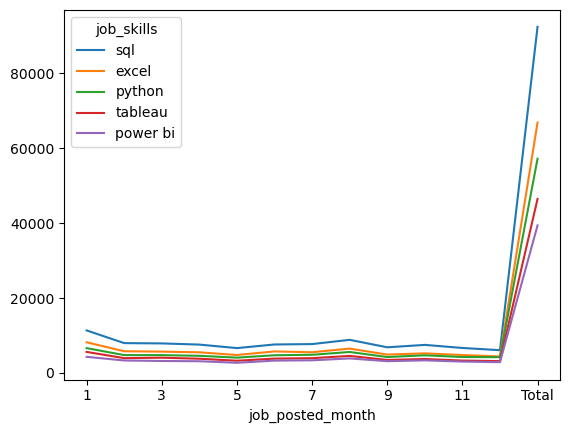

In [ ]:
## We want the first 5 skills to be ploted
##Understand how our pivot table is above 
# and is the reason we have used the iloc below to get all rows and first 5 columns
df_DA_pivot.iloc[:,:5].plot(kind='line')
##plt.xlim(0,12)

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,11336,8170,6606,5596,4285
2,7947,5772,4751,3936,3307
3,7868,5675,4741,4051,3176
4,7553,5496,4557,3776,3106
5,6617,4773,4070,3245,2695
6,7584,5724,4707,3812,3275
7,7687,5513,4831,3928,3350
8,8823,6482,5576,4533,3859
9,6829,4886,4229,3446,3118
